<a href="https://colab.research.google.com/github/MOISECHRIST/Tensorflow_DeepLearn_Course/blob/main/Tensorflow_Neural_Network_Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce projet nous allons parcourir les notions fondamentale du deeplearning avec tensorflow. Pour cette exercice, nous contruirons un modèle de classification des images issus du dataset fashion mnist.

Import Library

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense

import numpy as np

Import Data

In [9]:
data = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
X_train, y_train = data[0]
X_test, y_test = data[1]

In [11]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [12]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

Data Vizualisation

In [13]:
import matplotlib.pyplot as plt

In [14]:
img_id = np.random.choice(60000, 10)

In [15]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

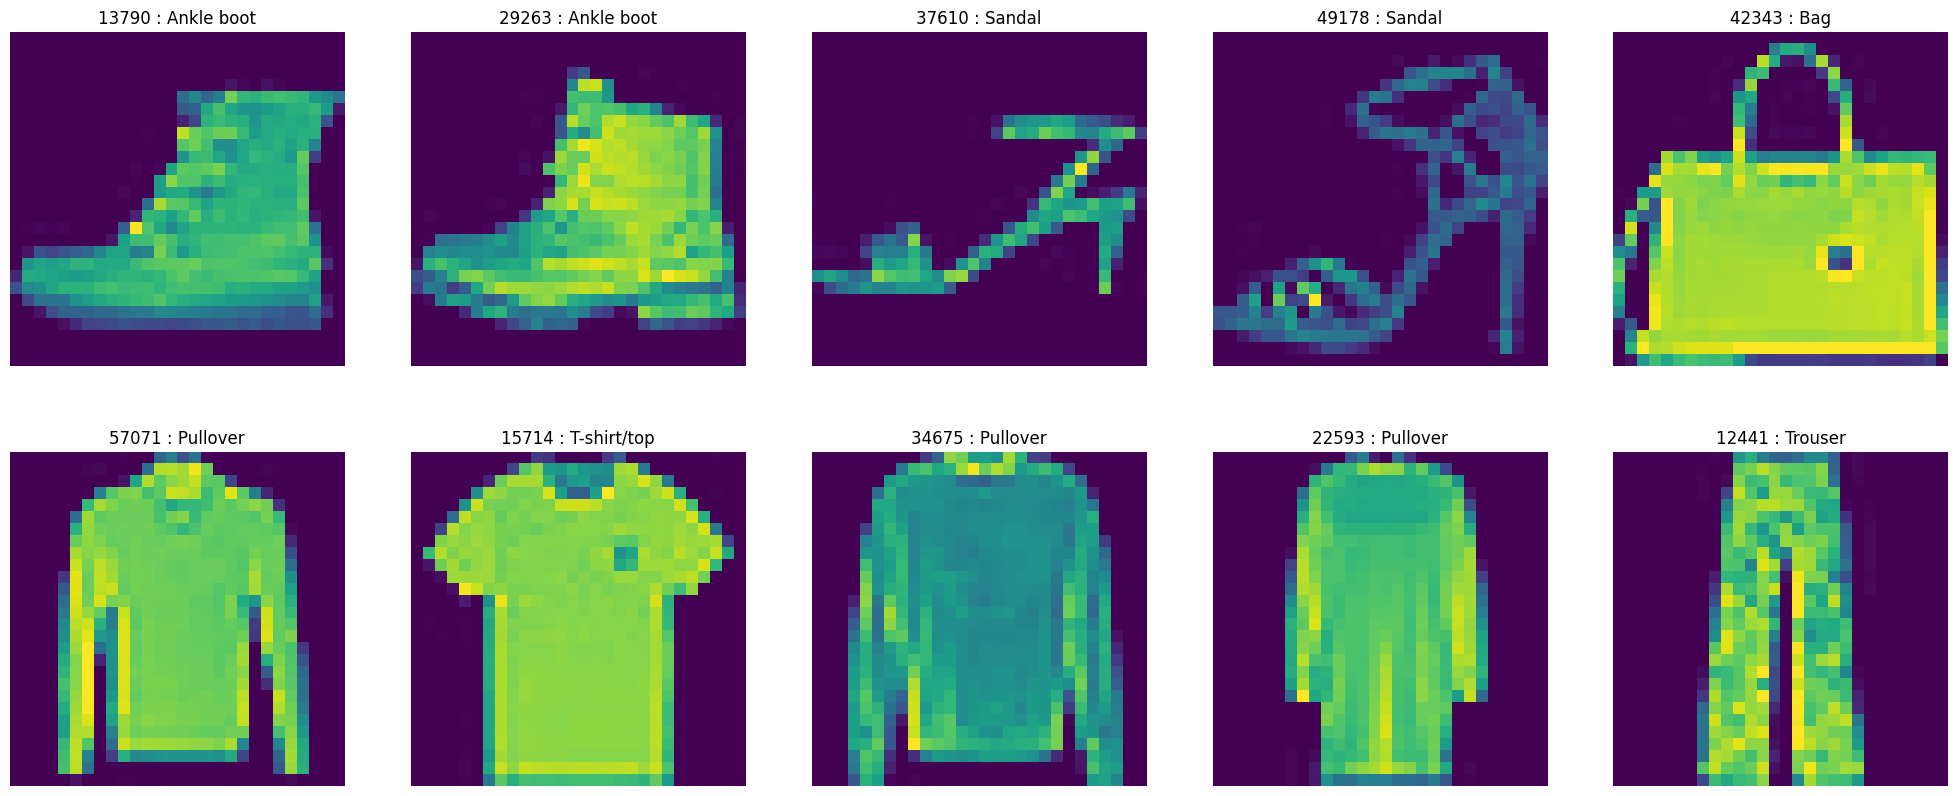

In [16]:
plt.figure(figsize=(25, 10))
for i, img in enumerate(img_id):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[img])
    plt.axis('off')
    plt.title(f"{img} : {labels[y_train[img]]}")

Inputs Data Processing

Le traitement des images ici consistera à les normaliser (entre 0 et 1) puis à les formater de matrice de pixels à vecteurs.

In [17]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [18]:
Flatten_X_train = X_train.reshape(60000, 784)
Flatten_X_test = X_test.reshape(10000, 784)

Outcome Processing

Pour ce qui est des labels, nous allons effectuer le One Hot Encoding qui consiste à avoir un vecteur de 10 elements sous à 0 sauf un seuls.

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
enc = OneHotEncoder()
ho_y_train = enc.fit_transform(y_train.reshape(60000,1))
hot_y_train = ho_y_train.toarray()

In [21]:
ho_y_train.shape

(60000, 10)

In [22]:
ho_y_test = enc.transform(y_test.reshape(10000,1))
hot_y_test = ho_y_test.toarray()

In [23]:
ho_y_test.shape

(10000, 10)

In [24]:
y_train[0], hot_y_train[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

In [25]:
y_test[0], hot_y_test[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

Model Configuration

In [26]:
model = Sequential()

In [27]:
model.add(Dense(units=784, activation='sigmoid', input_shape=(Flatten_X_train.shape[1],)))
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

Model Training

In [30]:
model.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4804 - loss: 1.8811
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7119 - loss: 1.0653
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7357 - loss: 0.8597
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7518 - loss: 0.7617
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7623 - loss: 0.7091
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7681 - loss: 0.6747
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7776 - loss: 0.6448
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7833 - loss: 0.6285
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7897 - loss: 0.6067
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7934 - loss: 0.5950
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8008 - loss: 0.5777
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 

In [31]:
metrics=model.history.history

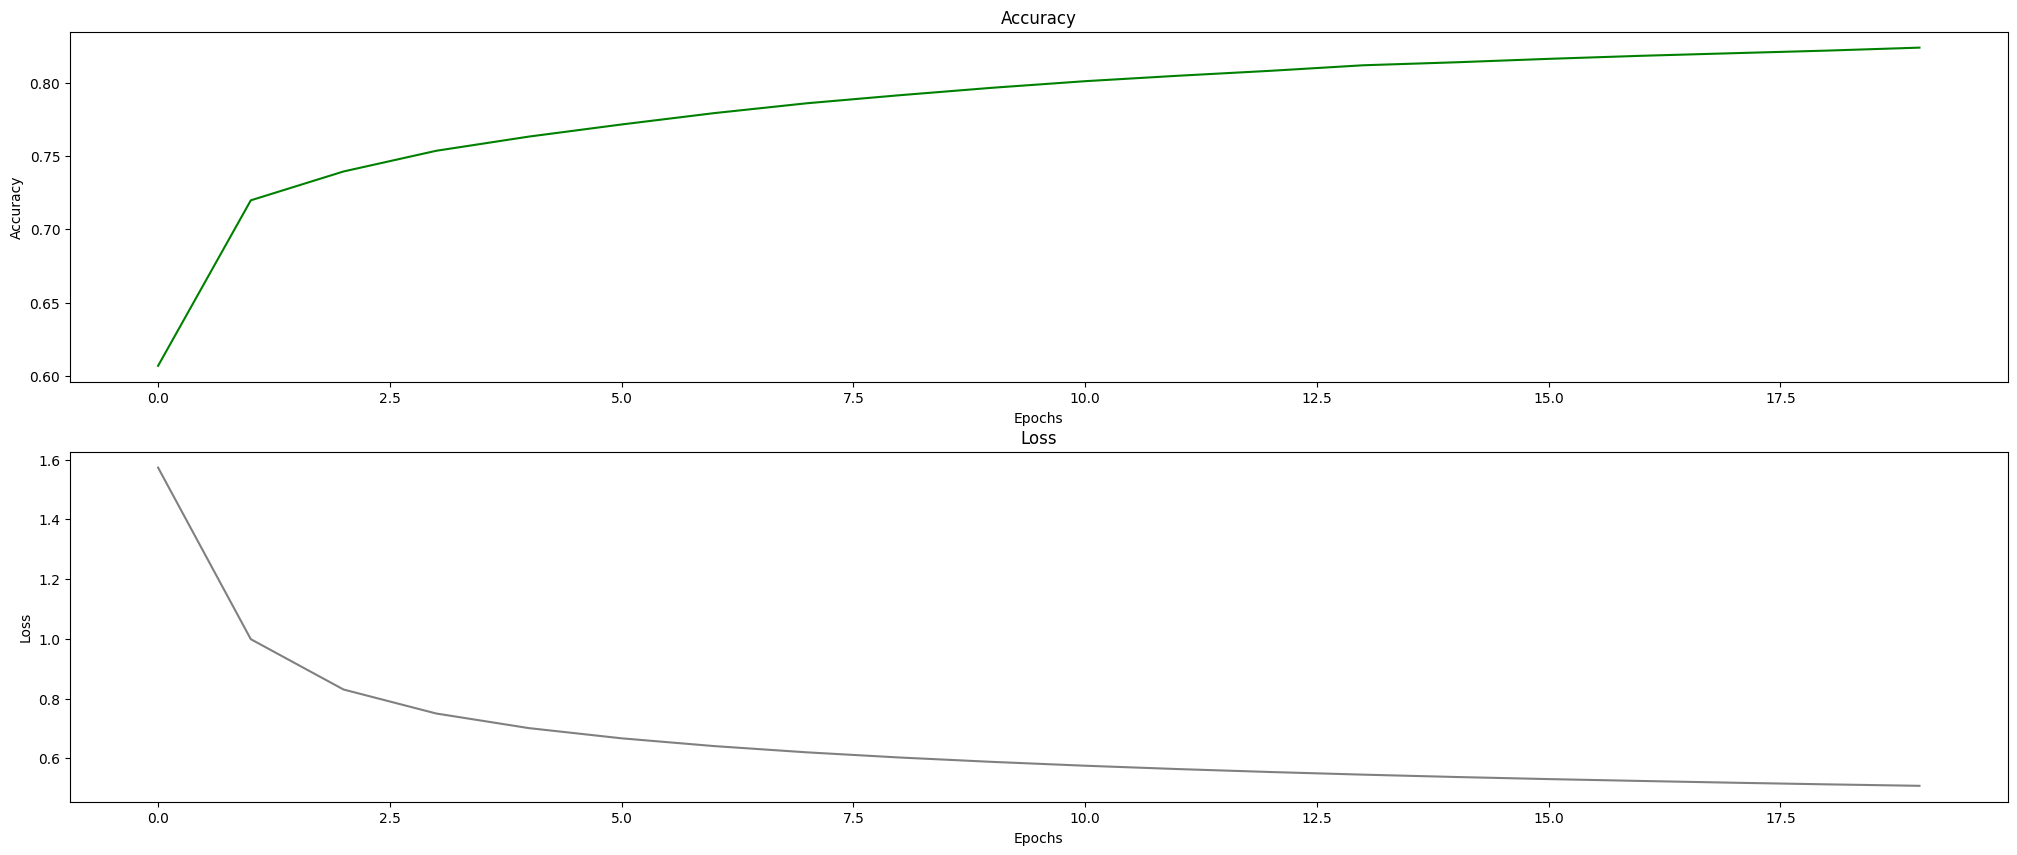

In [32]:
plt.figure(figsize=(25,10))
#Plot Accuracy
plt.subplot(2,1,1)
plt.plot(metrics['accuracy'], color='green')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


#Plot Loss
plt.subplot(2,1,2)
plt.plot(metrics['loss'], color='grey')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.show()

Model Evaluation

In [33]:
y_pred = model.predict(Flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


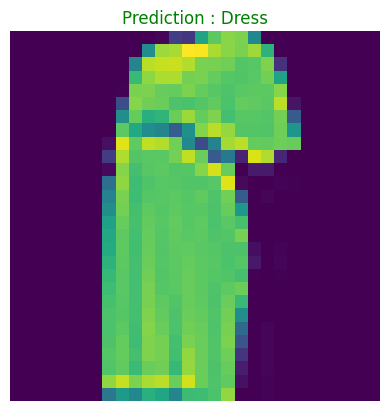

In [34]:
img = np.random.choice(10000)
plt.imshow(X_test[img])
plt.axis('off')
plt.title(f"Prediction : {labels[np.argmax(y_pred[img])]}", color='green' if np.argmax(y_pred[img])==y_test[img] else 'red')
plt.show()

In [35]:
y_pred_labels = np.array([labels[np.argmax(i)] for i in y_pred])
y_test_labels = np.array([labels[i] for i in y_test])

In [36]:
print(f"Test's accuracy : {100*np.sum(y_pred_labels==y_test_labels)/len(y_pred_labels):.3f} %")

Test's accuracy : 80.920 %


In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [38]:
cm = confusion_matrix(y_test_labels, y_pred_labels)

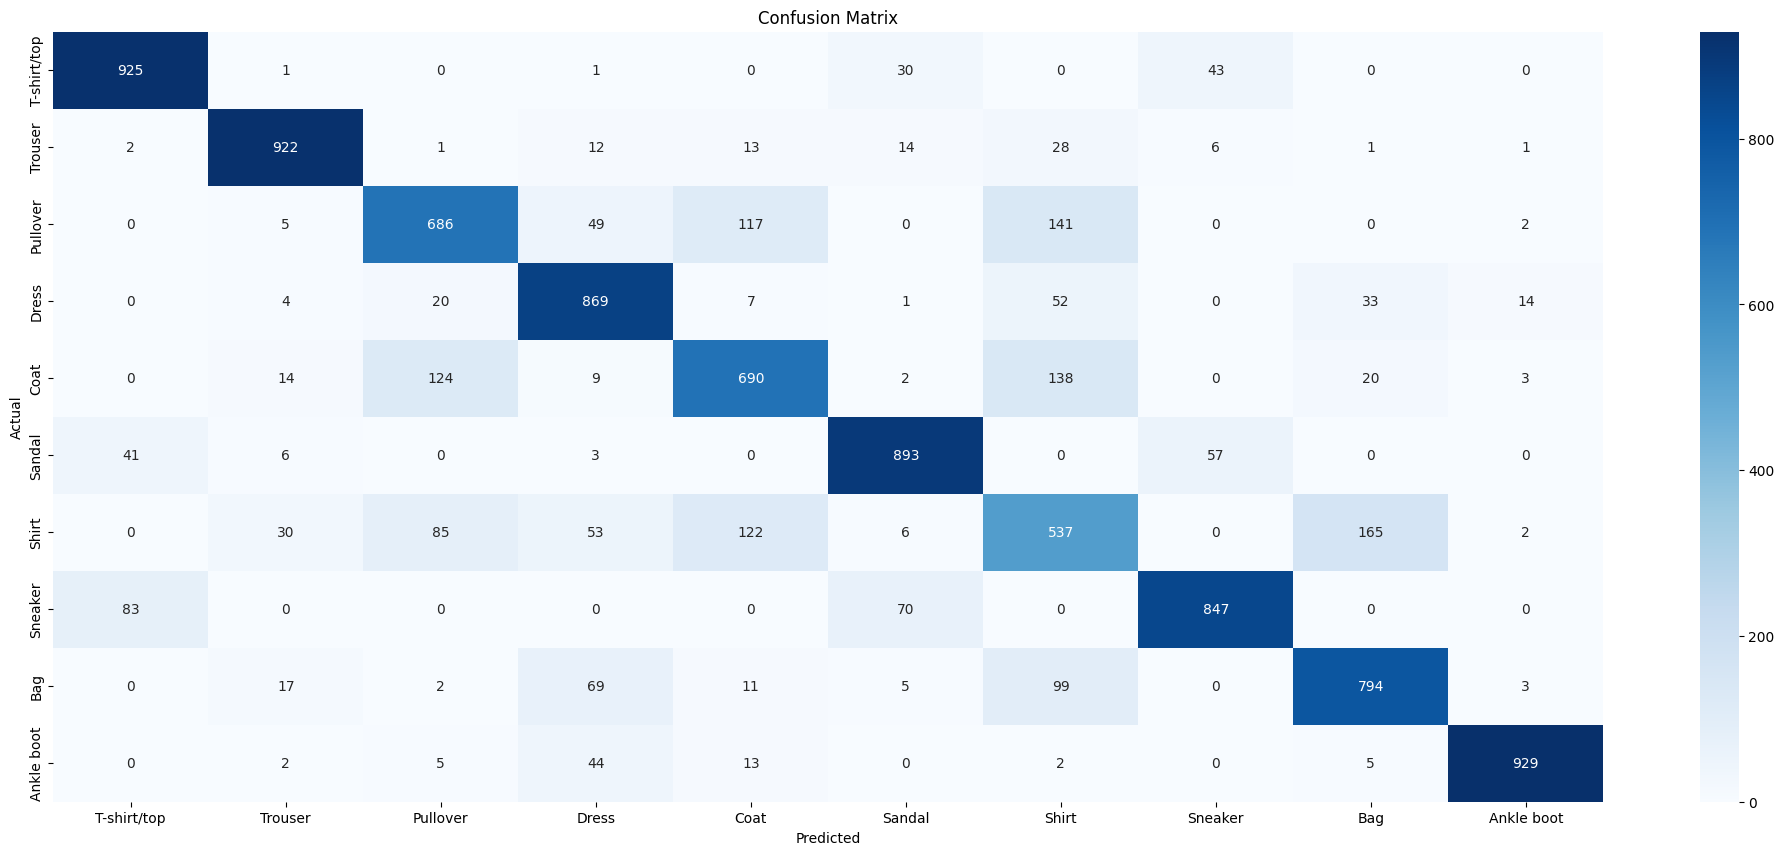

In [39]:
plt.figure(figsize=(25,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
from joblib import dump

In [41]:
dump(model, 'model_sigmoid_fashion_mnist_tf_neural_network.joblib')

['model_sigmoid_fashion_mnist_tf_neural_network.joblib']

In [42]:
model2 = Sequential()

In [43]:
model2.add(Dense(units=784, activation='relu', input_shape=(Flatten_X_train.shape[1],)))
model2.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,292 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [45]:
model2.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model2.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6305 - loss: 1.2332
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7950 - loss: 0.6387
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8164 - loss: 0.5571
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8291 - loss: 0.5145
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8355 - loss: 0.4897
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8418 - loss: 0.4690
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8439 - loss: 0.4588
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8457 - loss: 0.4476
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8519 - loss: 0.4362
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8560 - loss: 0.4248
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8555 - loss: 0.4271
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [47]:
metrics2=model2.history.history

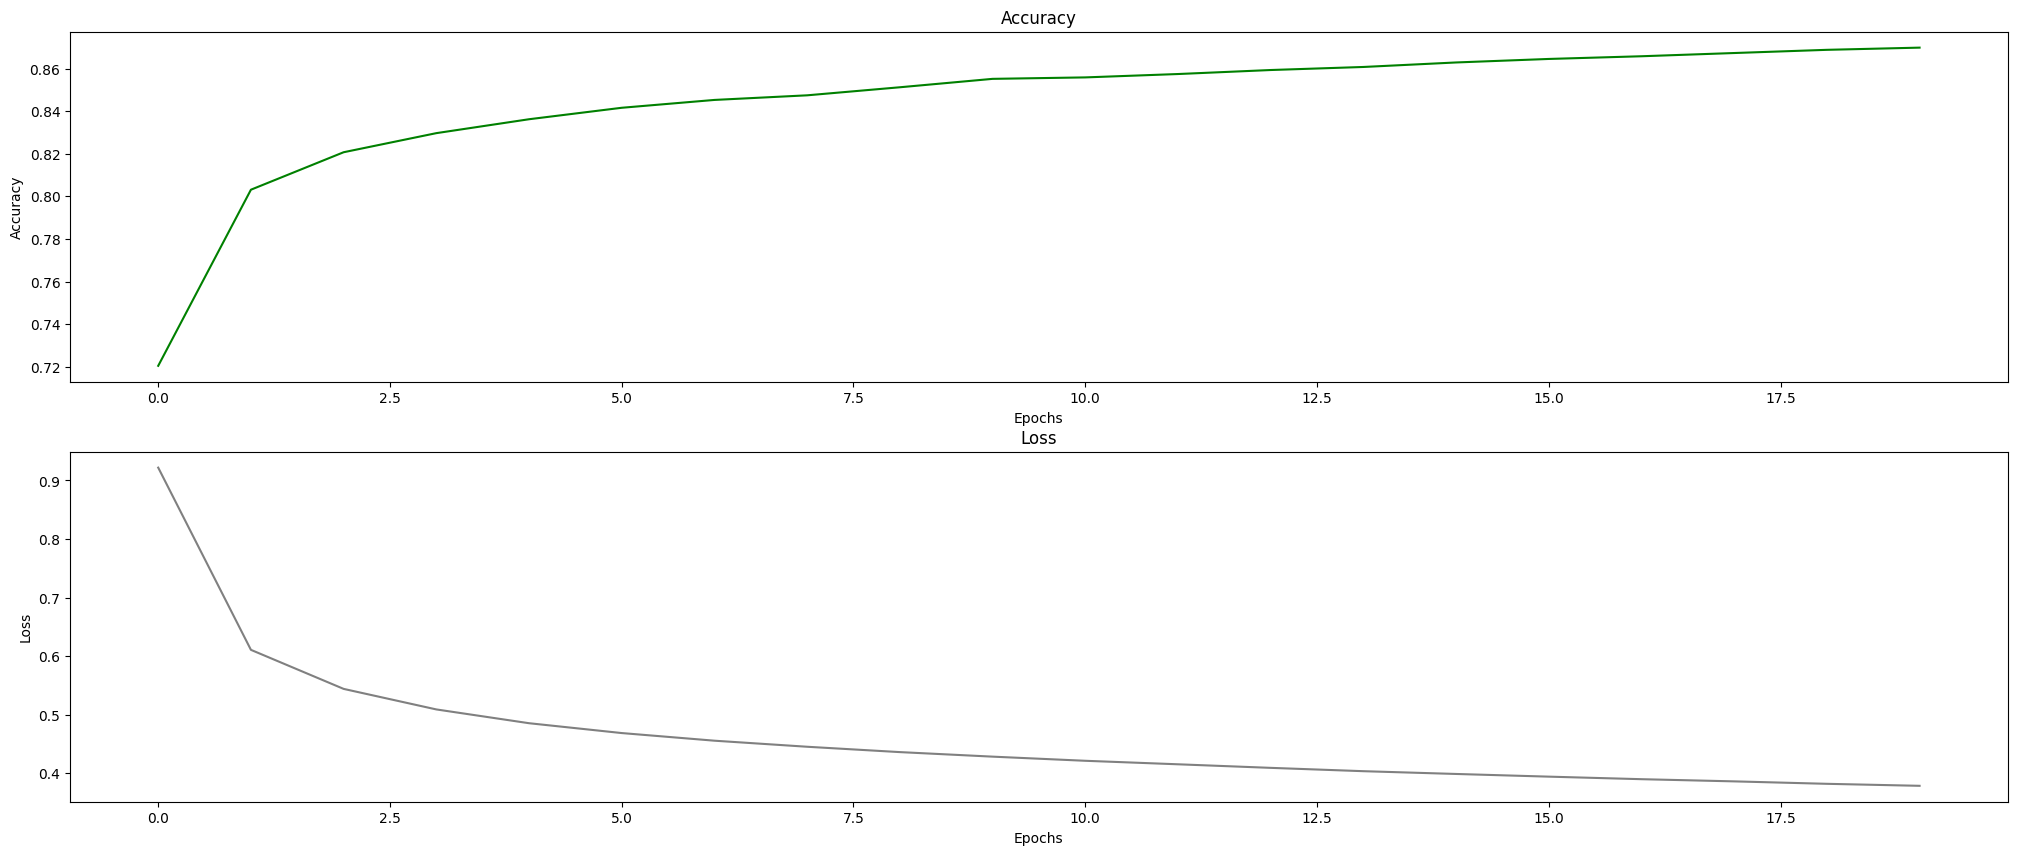

In [48]:
plt.figure(figsize=(25,10))
#Plot Accuracy
plt.subplot(2,1,1)
plt.plot(metrics2['accuracy'], color='green')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


#Plot Loss
plt.subplot(2,1,2)
plt.plot(metrics2['loss'], color='grey')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.show()

In [49]:
y_pred2 = model2.predict(Flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


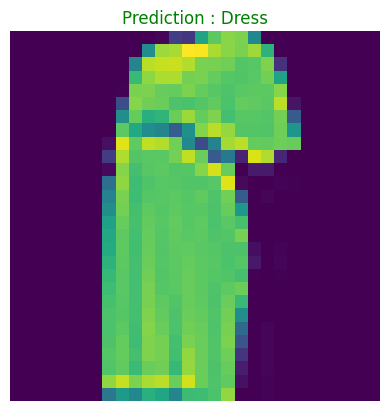

In [50]:
plt.imshow(X_test[img])
plt.axis('off')
plt.title(f"Prediction : {labels[np.argmax(y_pred2[img])]}", color='green' if np.argmax(y_pred2[img])==y_test[img] else 'red')
plt.show()

In [51]:
y_pred2_labels = np.array([labels[np.argmax(i)] for i in y_pred2])

In [52]:
print(f"Test's accuracy : {100*np.sum(y_pred2_labels==y_test_labels)/len(y_pred2_labels):.3f} %")

Test's accuracy : 85.500 %


In [53]:
cm2 = confusion_matrix(y_test_labels, y_pred2_labels)

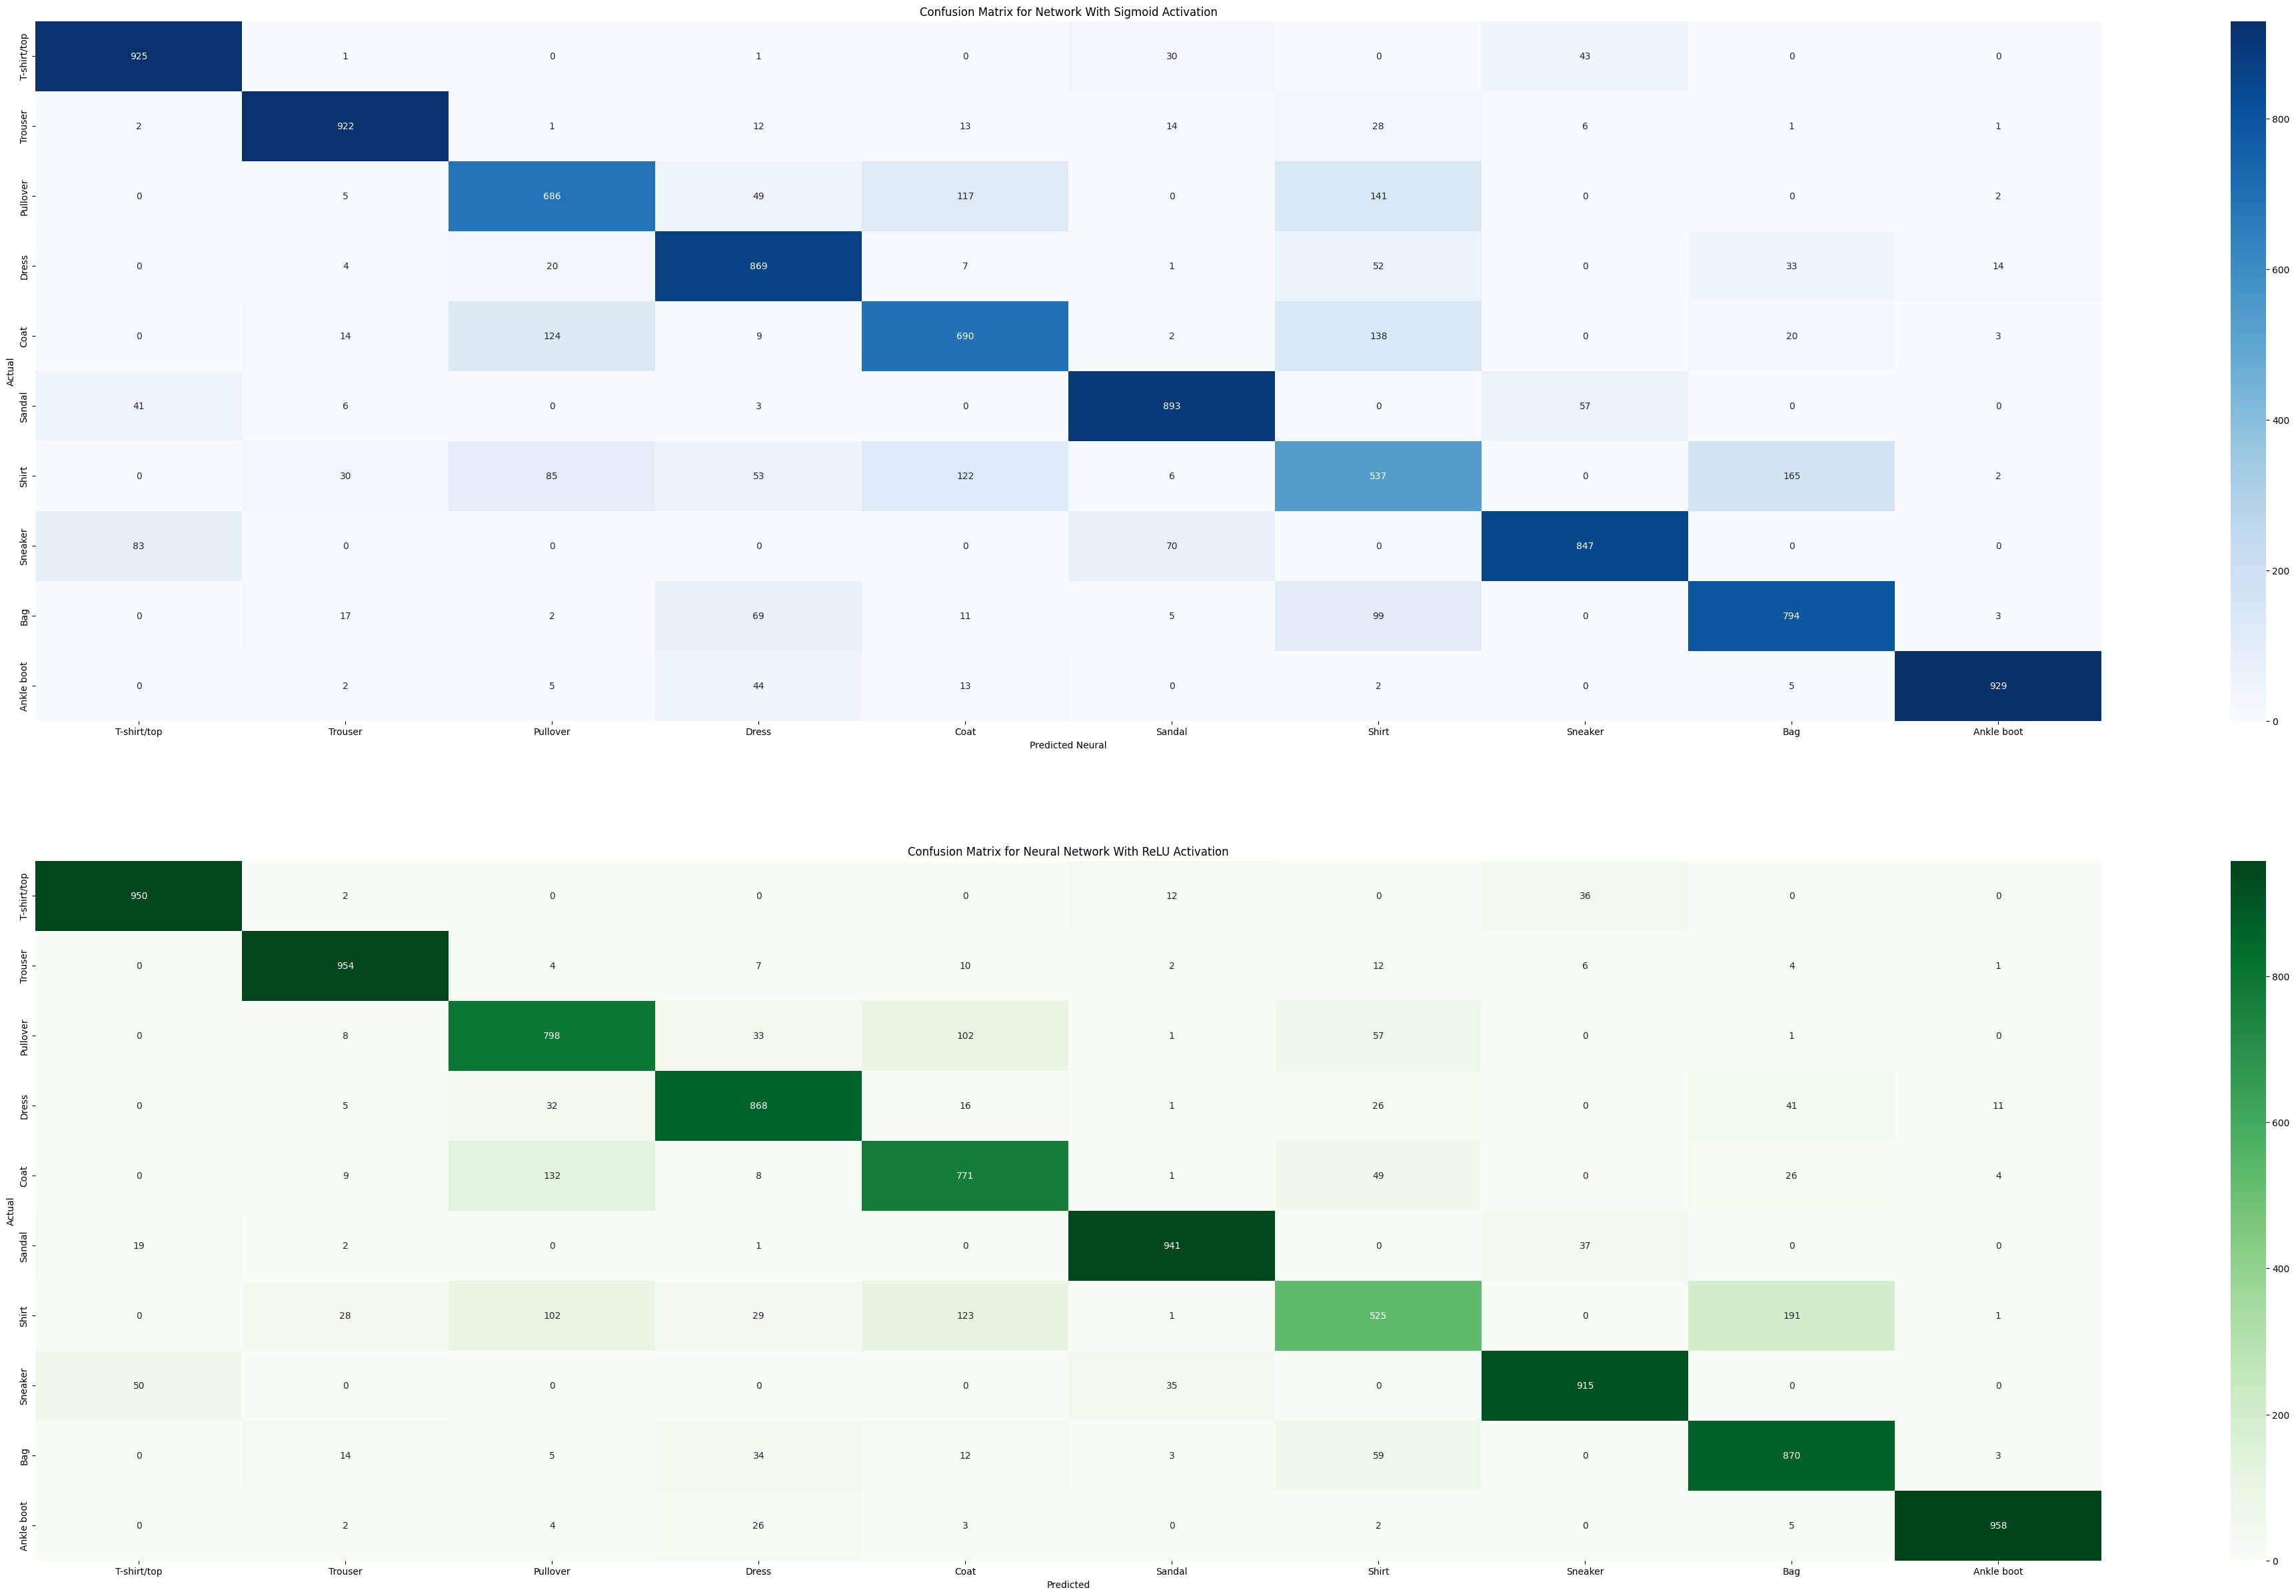

In [54]:
plt.figure(figsize=(50,30))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Neural')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Network With Sigmoid Activation')

plt.subplot(2,1,2)
sns.heatmap(cm2, annot=True, cmap='Greens',fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network With ReLU Activation')
plt.show()

In [55]:
dump(model, 'model_relu_fashion_mnist_tf_neural_network.joblib')

['model_relu_fashion_mnist_tf_neural_network.joblib']

In [56]:
import pandas as pd

In [57]:
def compute_metrics(conf_mat, labels):
  sum_col=[]
  sum_line=[]
  df=[]
  for index in range(conf_mat.shape[0]):
    sum_col.append(np.sum(cm[:,index]))
    sum_line.append(np.sum(cm[index,:]))


  for index in range(cm.shape[0]):
      res=dict()
      precision=cm[index,index]/sum_col[index]
      rappel=cm[index,index]/sum_line[index]
      f1score = 1/((1/2)*((1/precision)+(1/rappel)))
      res["Precision"]=float(precision)
      res["Rappel"]=float(rappel)
      res["F1Score"]=float(f1score)
      res["Classe"]=labels[index]
      df.append(res)
  return pd.DataFrame(df)

In [58]:
metrics_cm=compute_metrics(cm, labels)
metrics_cm2=compute_metrics(cm2, labels)

In [59]:
def plot_metrics(df):
  FIG_SIZE=[25,20]
  plt.figure(figsize=FIG_SIZE)
  plt.subplot(3,1,1)
  # Création du barplot
  barplot = sns.barplot(data=df, y='Precision', x=df.index, color='slategray')
  plt.xlabel('Classe')
  # Ajout des annotations
  for p in barplot.patches:
      barplot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
  barplot.set_xticklabels(labels)

  plt.subplot(3,1,2)

  # Création du barplot
  barplot = sns.barplot(data=df,y='Rappel', x=df.index,color='slategray')
  plt.xlabel('Classe')
  # Ajout des annotations
  for p in barplot.patches:
      barplot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
  barplot.set_xticklabels(labels)
  plt.subplot(3,1,3)
  # Création du barplot
  barplot = sns.barplot(data=df,y='F1Score', x=df.index,color='slategray')
  plt.xlabel('Classe')
  # Ajout des annotations
  for p in barplot.patches:
      barplot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
  barplot.set_xticklabels(df['Classe'])
  plt.show()

<ipython-input-59-67a619debfcd>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-59-67a619debfcd>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-59-67a619debfcd>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(df['Classe'])


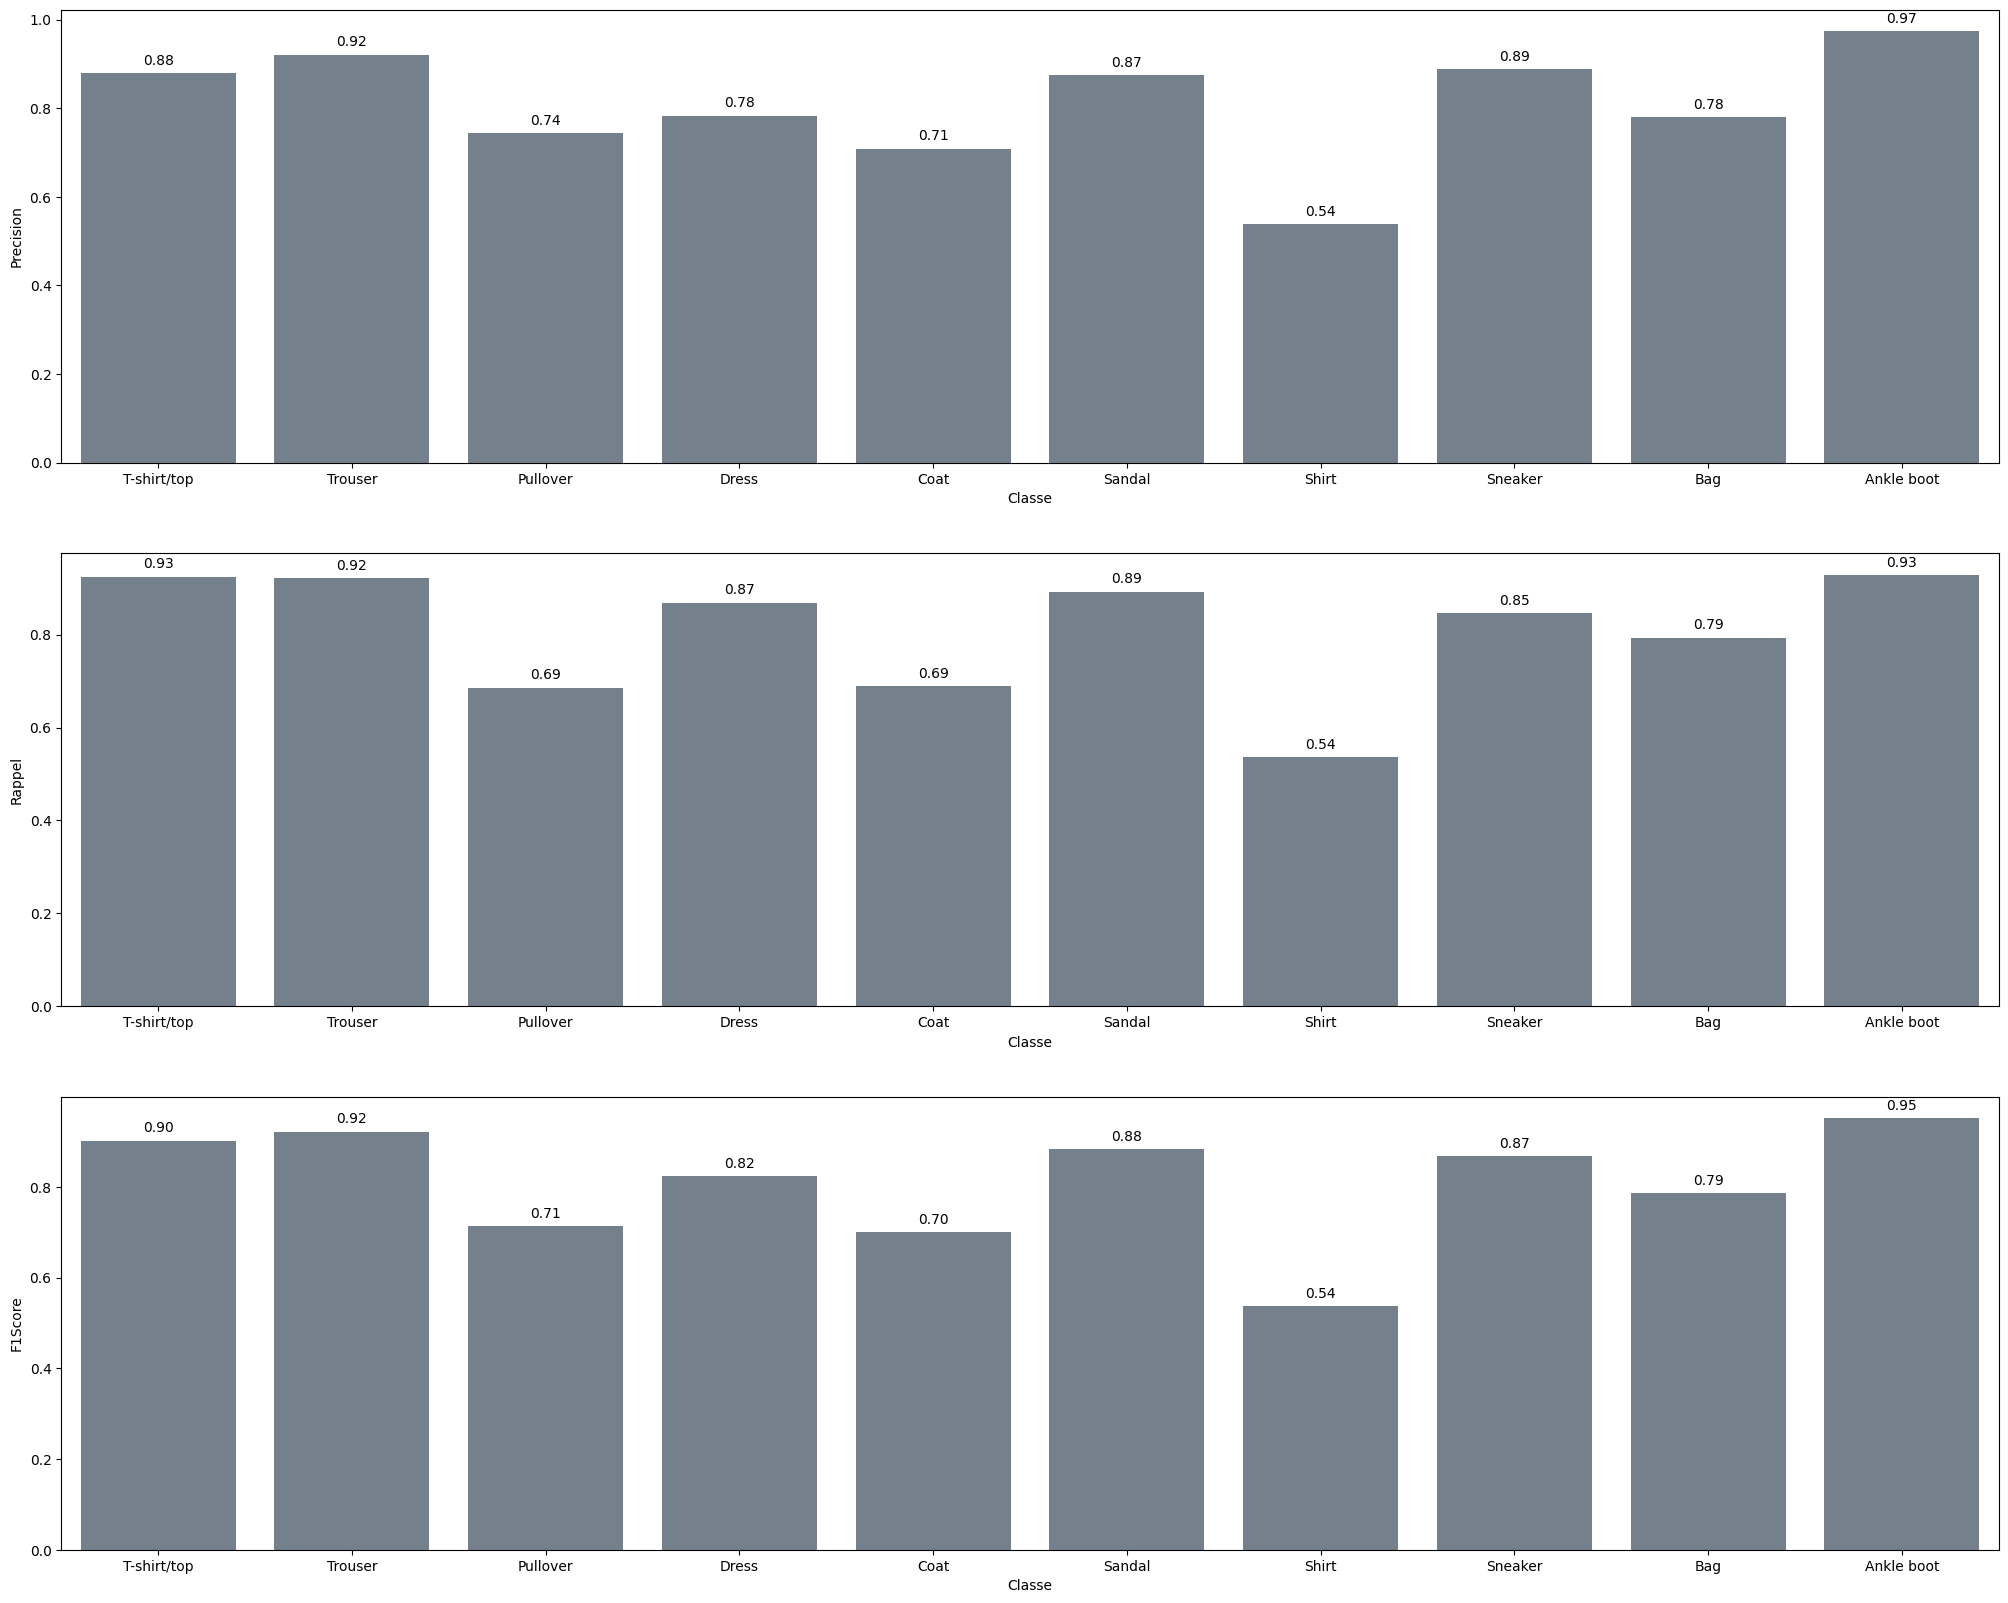

In [60]:
plot_metrics(metrics_cm)

<ipython-input-59-67a619debfcd>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-59-67a619debfcd>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-59-67a619debfcd>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(df['Classe'])


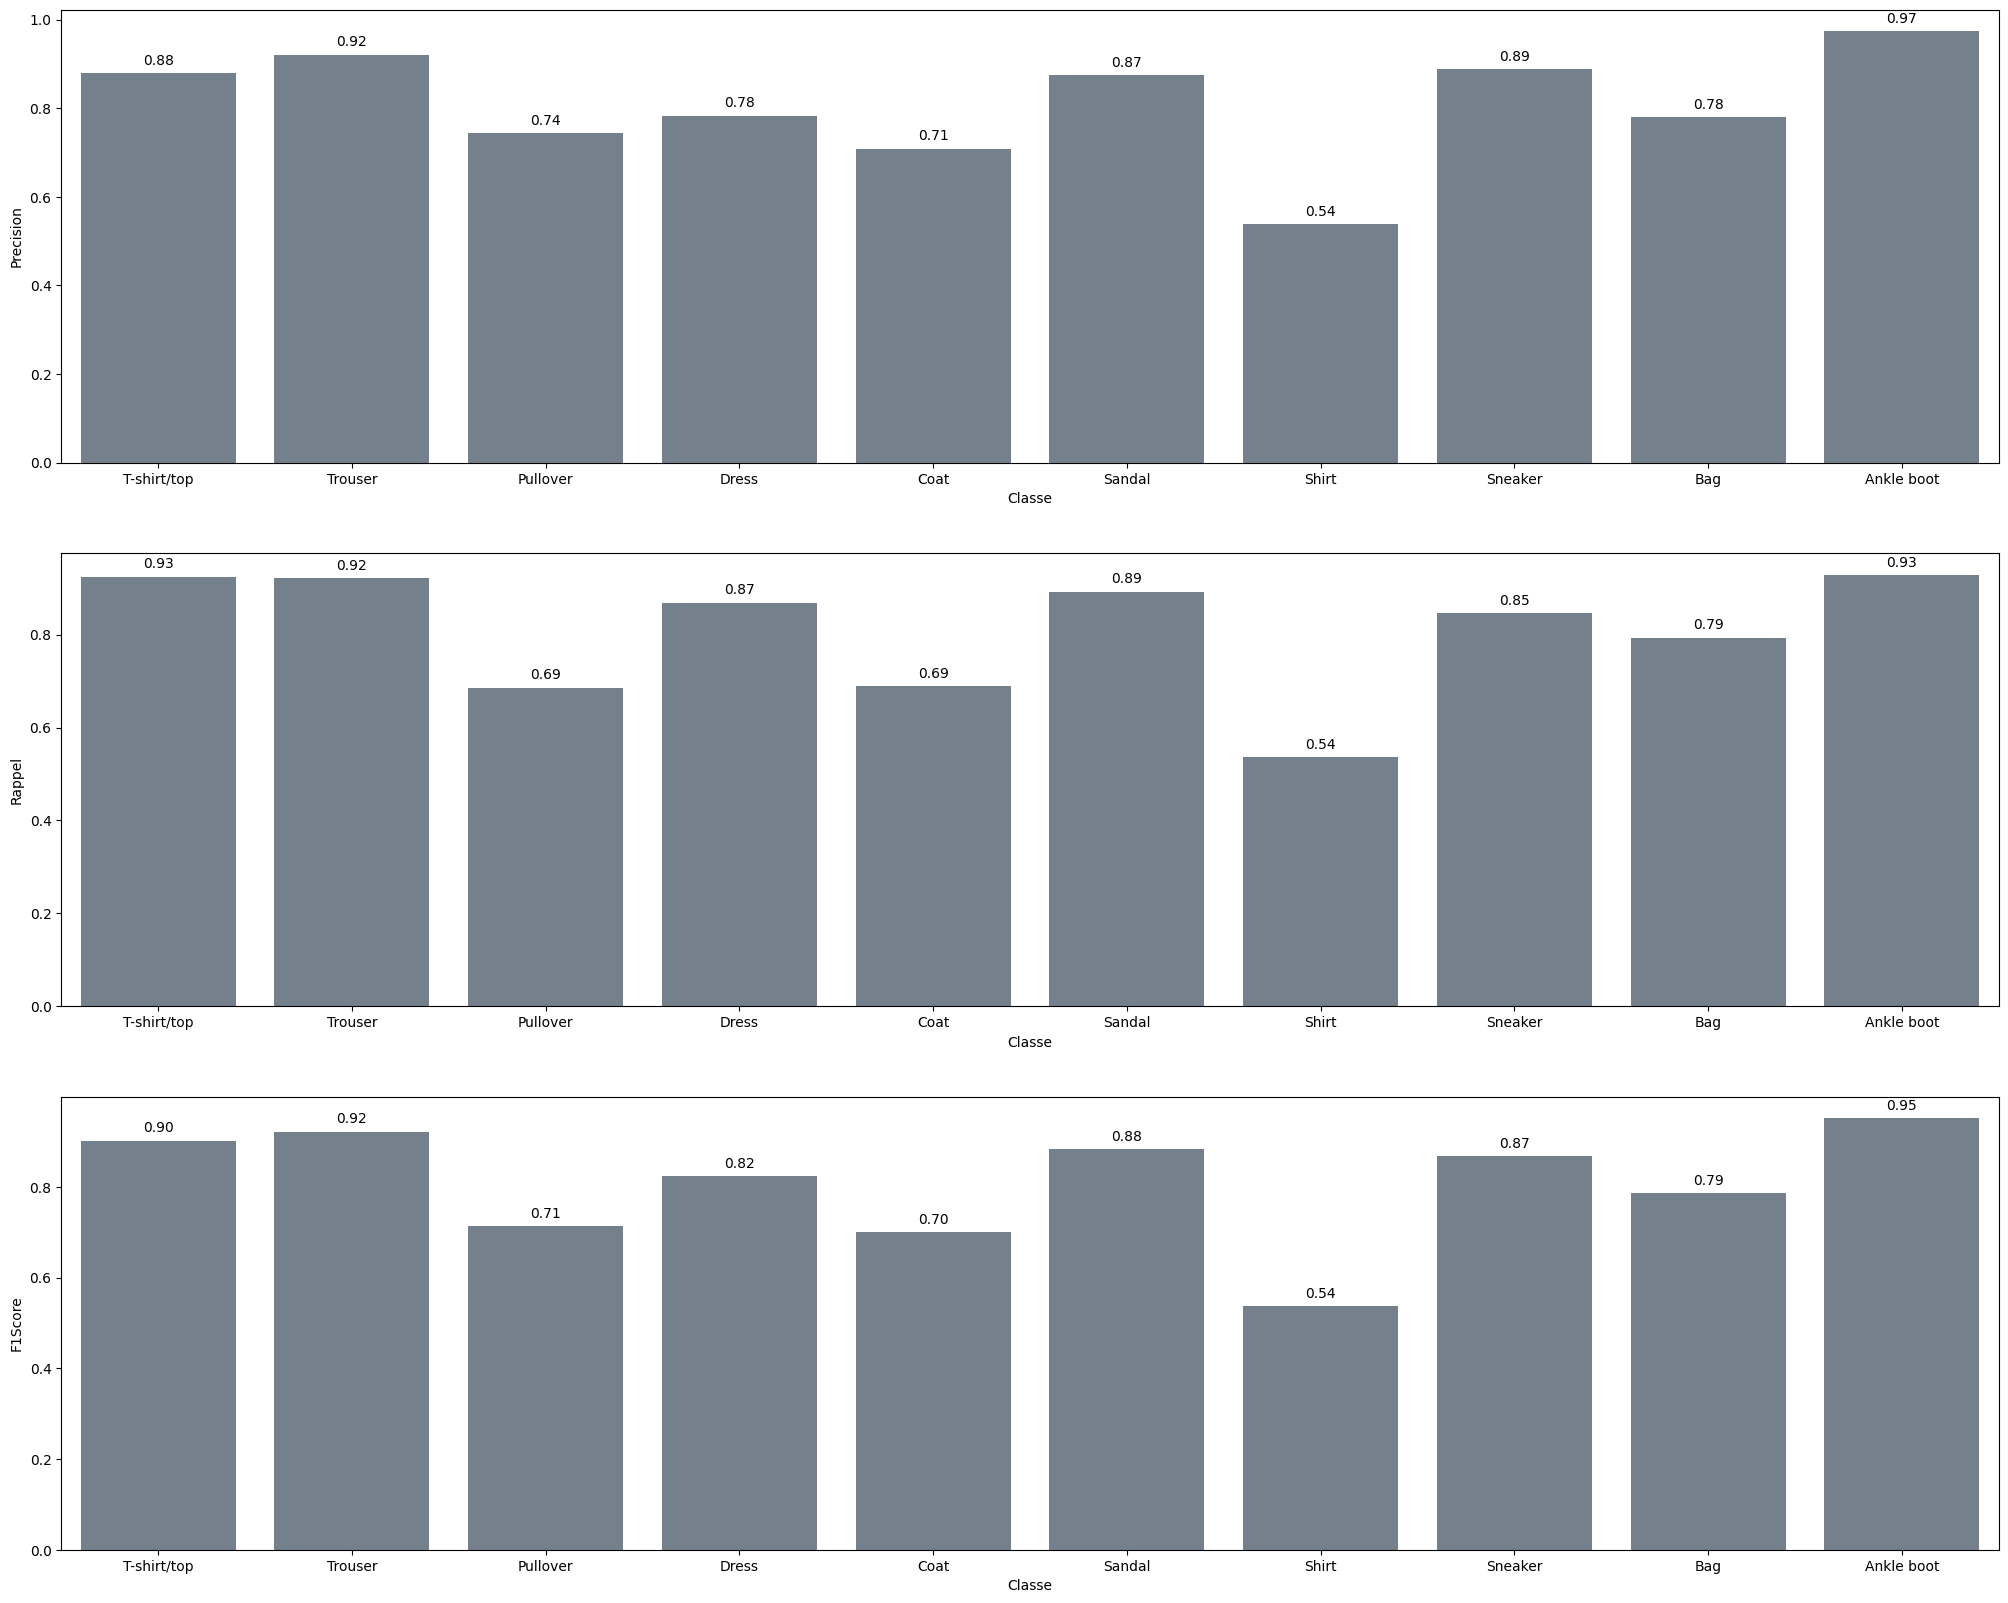

In [61]:
plot_metrics(metrics_cm2)

In [62]:
metrics_cm

,Precision,Rappel,F1Score,Classe
0,0.880114,0.925,0.901999,T-shirt/top
1,0.921079,0.922,0.921539,Trouser
2,0.743229,0.686,0.713469,Pullover
3,0.783589,0.869,0.824087,Dress
4,0.709147,0.690,0.699442,Coat
5,0.874633,0.893,0.883721,Sandal
6,0.538616,0.537,0.537807,Shirt
7,0.888772,0.847,0.867384,Sneaker
8,0.779961,0.794,0.786918,Bag
9,0.973795,0.929,0.950870,Ankle boot


In [63]:
metrics_cm2

,Precision,Rappel,F1Score,Classe
0,0.880114,0.925,0.901999,T-shirt/top
1,0.921079,0.922,0.921539,Trouser
2,0.743229,0.686,0.713469,Pullover
3,0.783589,0.869,0.824087,Dress
4,0.709147,0.690,0.699442,Coat
5,0.874633,0.893,0.883721,Sandal
6,0.538616,0.537,0.537807,Shirt
7,0.888772,0.847,0.867384,Sneaker
8,0.779961,0.794,0.786918,Bag
9,0.973795,0.929,0.950870,Ankle boot


A présent nous allons augmenter la complexité de notre modèle en ajoutant une couche caché.

In [64]:
model = Sequential()

In [65]:
model.add(Dense(units=784, activation='relu', input_shape=(Flatten_X_train.shape[1],)))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,950 (2.65 MB)

 Trainable params: 694,950 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7802 - loss: 0.6266
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8668 - loss: 0.3644
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8808 - loss: 0.3209
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8905 - loss: 0.2930
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8930 - loss: 0.2824
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9012 - loss: 0.2615
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9046 - loss: 0.2563
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9070 - loss: 0.2449
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9147 - loss: 0.2270
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9160 - loss: 0.2219
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9197 - loss: 0.2115
Epoch 12/20
600/600 ━━━━━━━━━━━━━━

In [69]:
y_pred3 = model.predict(Flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [70]:
y_pred3_labels = np.array([labels[np.argmax(i)] for i in y_pred3])

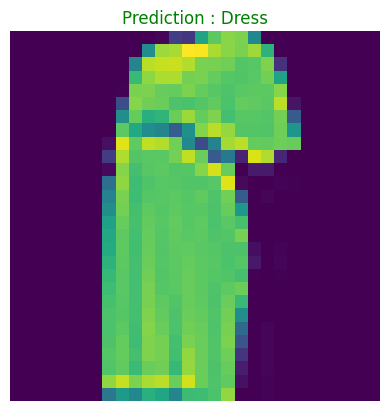

In [71]:
plt.imshow(X_test[img])
plt.axis('off')
plt.title(f"Prediction : {labels[np.argmax(y_pred3[img])]}", color='green' if np.argmax(y_pred3[img])==y_test[img] else 'red')
plt.show()

In [72]:
print(f"Test's accuracy : {100*np.sum(y_pred3_labels==y_test_labels)/len(y_pred3_labels):.3f} %")

Test's accuracy : 89.150 %


In [73]:
dump(model, 'model_relu_deep_adam_fashion_mnist_tf_neural_network.joblib')

['model_relu_deep_adam_fashion_mnist_tf_neural_network.joblib']

On observe ici un problème de surapprentissage avec pour des données de test une accuracy de 89.20% contre une accuraty de 94.29% sur les données d’entraînement.

Overfiting removing

In [74]:
from tensorflow.keras.layers import Dropout

In [75]:
model = Sequential()

In [76]:
model.add(Dense(units=784, activation='relu', input_shape=(Flatten_X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

In [77]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,950 (2.65 MB)

 Trainable params: 694,950 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7209 - loss: 0.7866
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8336 - loss: 0.4655
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8500 - loss: 0.4110
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8570 - loss: 0.3935
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8614 - loss: 0.3751
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8667 - loss: 0.3616
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8687 - loss: 0.3517
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.8704 - loss: 0.3507
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8771 - loss: 0.3327
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8789 - loss: 0.3273
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8833 - loss: 0.3158
Epoch 12/20
600/600 ━━━━━━━━━━

In [80]:
y_pred3 = model.predict(Flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [81]:
y_pred3_labels = np.array([labels[np.argmax(i)] for i in y_pred3])

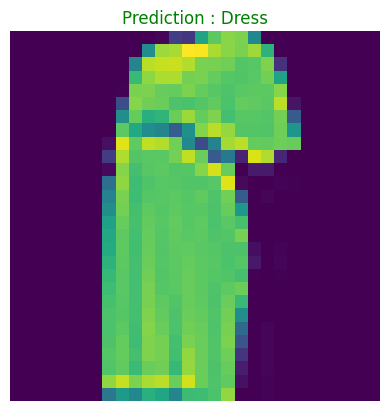

In [82]:
plt.imshow(X_test[img])
plt.axis('off')
plt.title(f"Prediction : {labels[np.argmax(y_pred3[img])]}", color='green' if np.argmax(y_pred3[img])==y_test[img] else 'red')
plt.show()

In [83]:
print(f"Test's accuracy : {100*np.sum(y_pred3_labels==y_test_labels)/len(y_pred3_labels):.3f} %")

Test's accuracy : 88.590 %


In [84]:
(f"{94.29-89.20:.3f}", f"{92.83-89.28:.3f}")

('5.090', '3.550')

On observe qu'ici l'écart entre les performances en tests sont plus proche de celle des données d'entrainement et de plus le modèle s'est amélioré

In [85]:
dump(model, 'model_relu_deep_adam_dropout_fashion_mnist_tf_neural_network.joblib')

['model_relu_deep_adam_dropout_fashion_mnist_tf_neural_network.joblib']

In [86]:
cm3 = confusion_matrix(y_test_labels, y_pred3_labels)

Text(0.5, 1.0, 'Confusion Matrix')

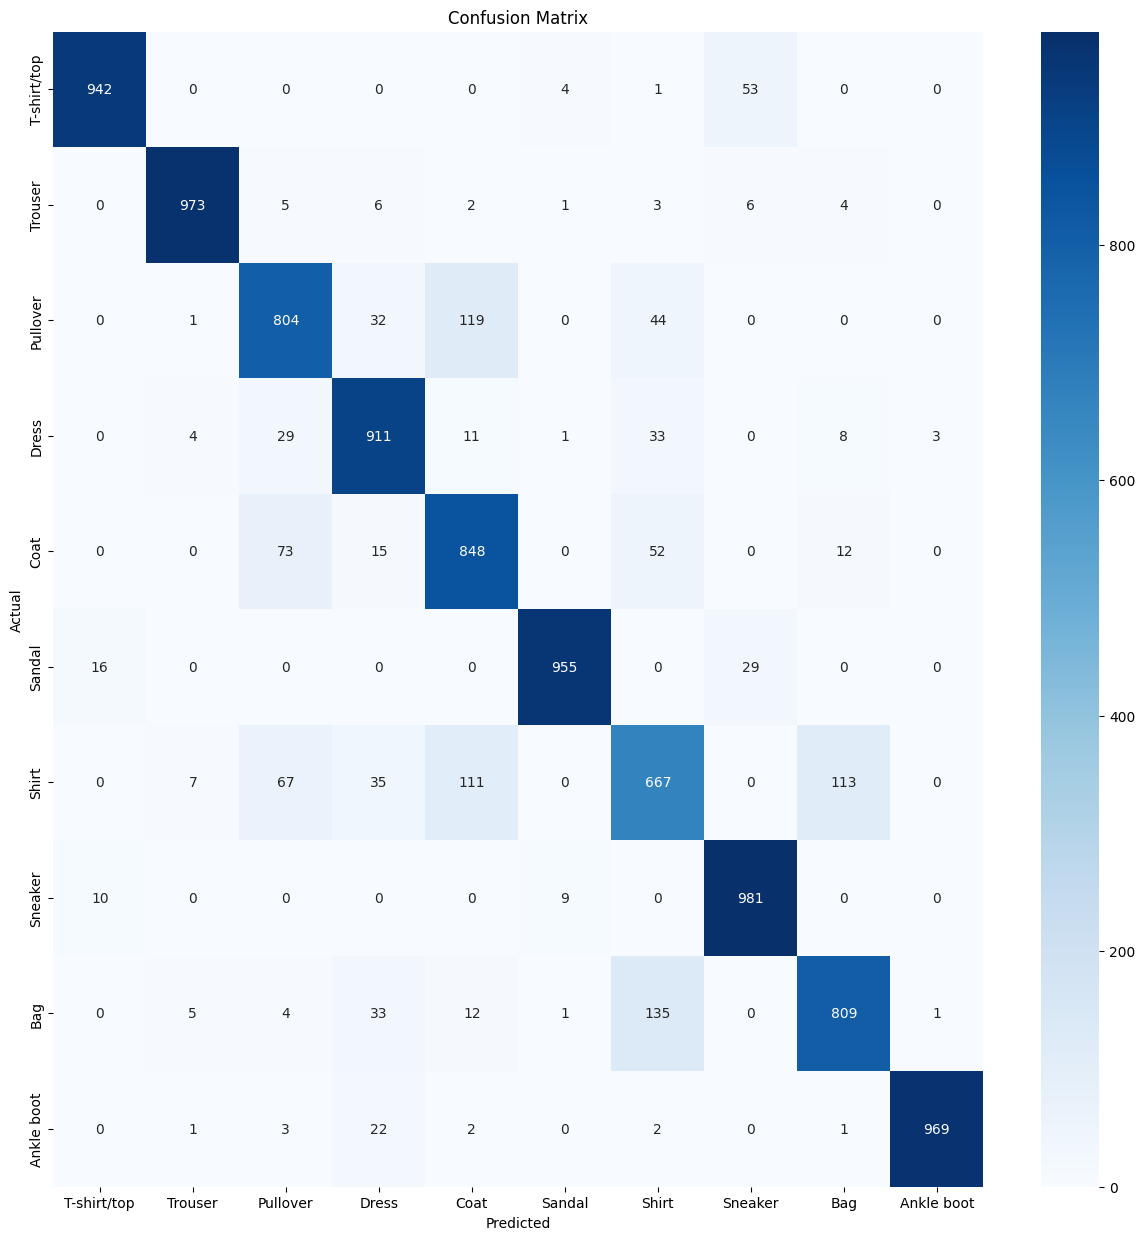

In [87]:
plt.figure(figsize=(15,15))
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [88]:
metrics_cm3=compute_metrics(cm3, labels)

In [89]:
metrics_cm3

,Precision,Rappel,F1Score,Classe
0,0.880114,0.925,0.901999,T-shirt/top
1,0.921079,0.922,0.921539,Trouser
2,0.743229,0.686,0.713469,Pullover
3,0.783589,0.869,0.824087,Dress
4,0.709147,0.690,0.699442,Coat
5,0.874633,0.893,0.883721,Sandal
6,0.538616,0.537,0.537807,Shirt
7,0.888772,0.847,0.867384,Sneaker
8,0.779961,0.794,0.786918,Bag
9,0.973795,0.929,0.950870,Ankle boot


<ipython-input-59-67a619debfcd>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-59-67a619debfcd>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-59-67a619debfcd>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(df['Classe'])


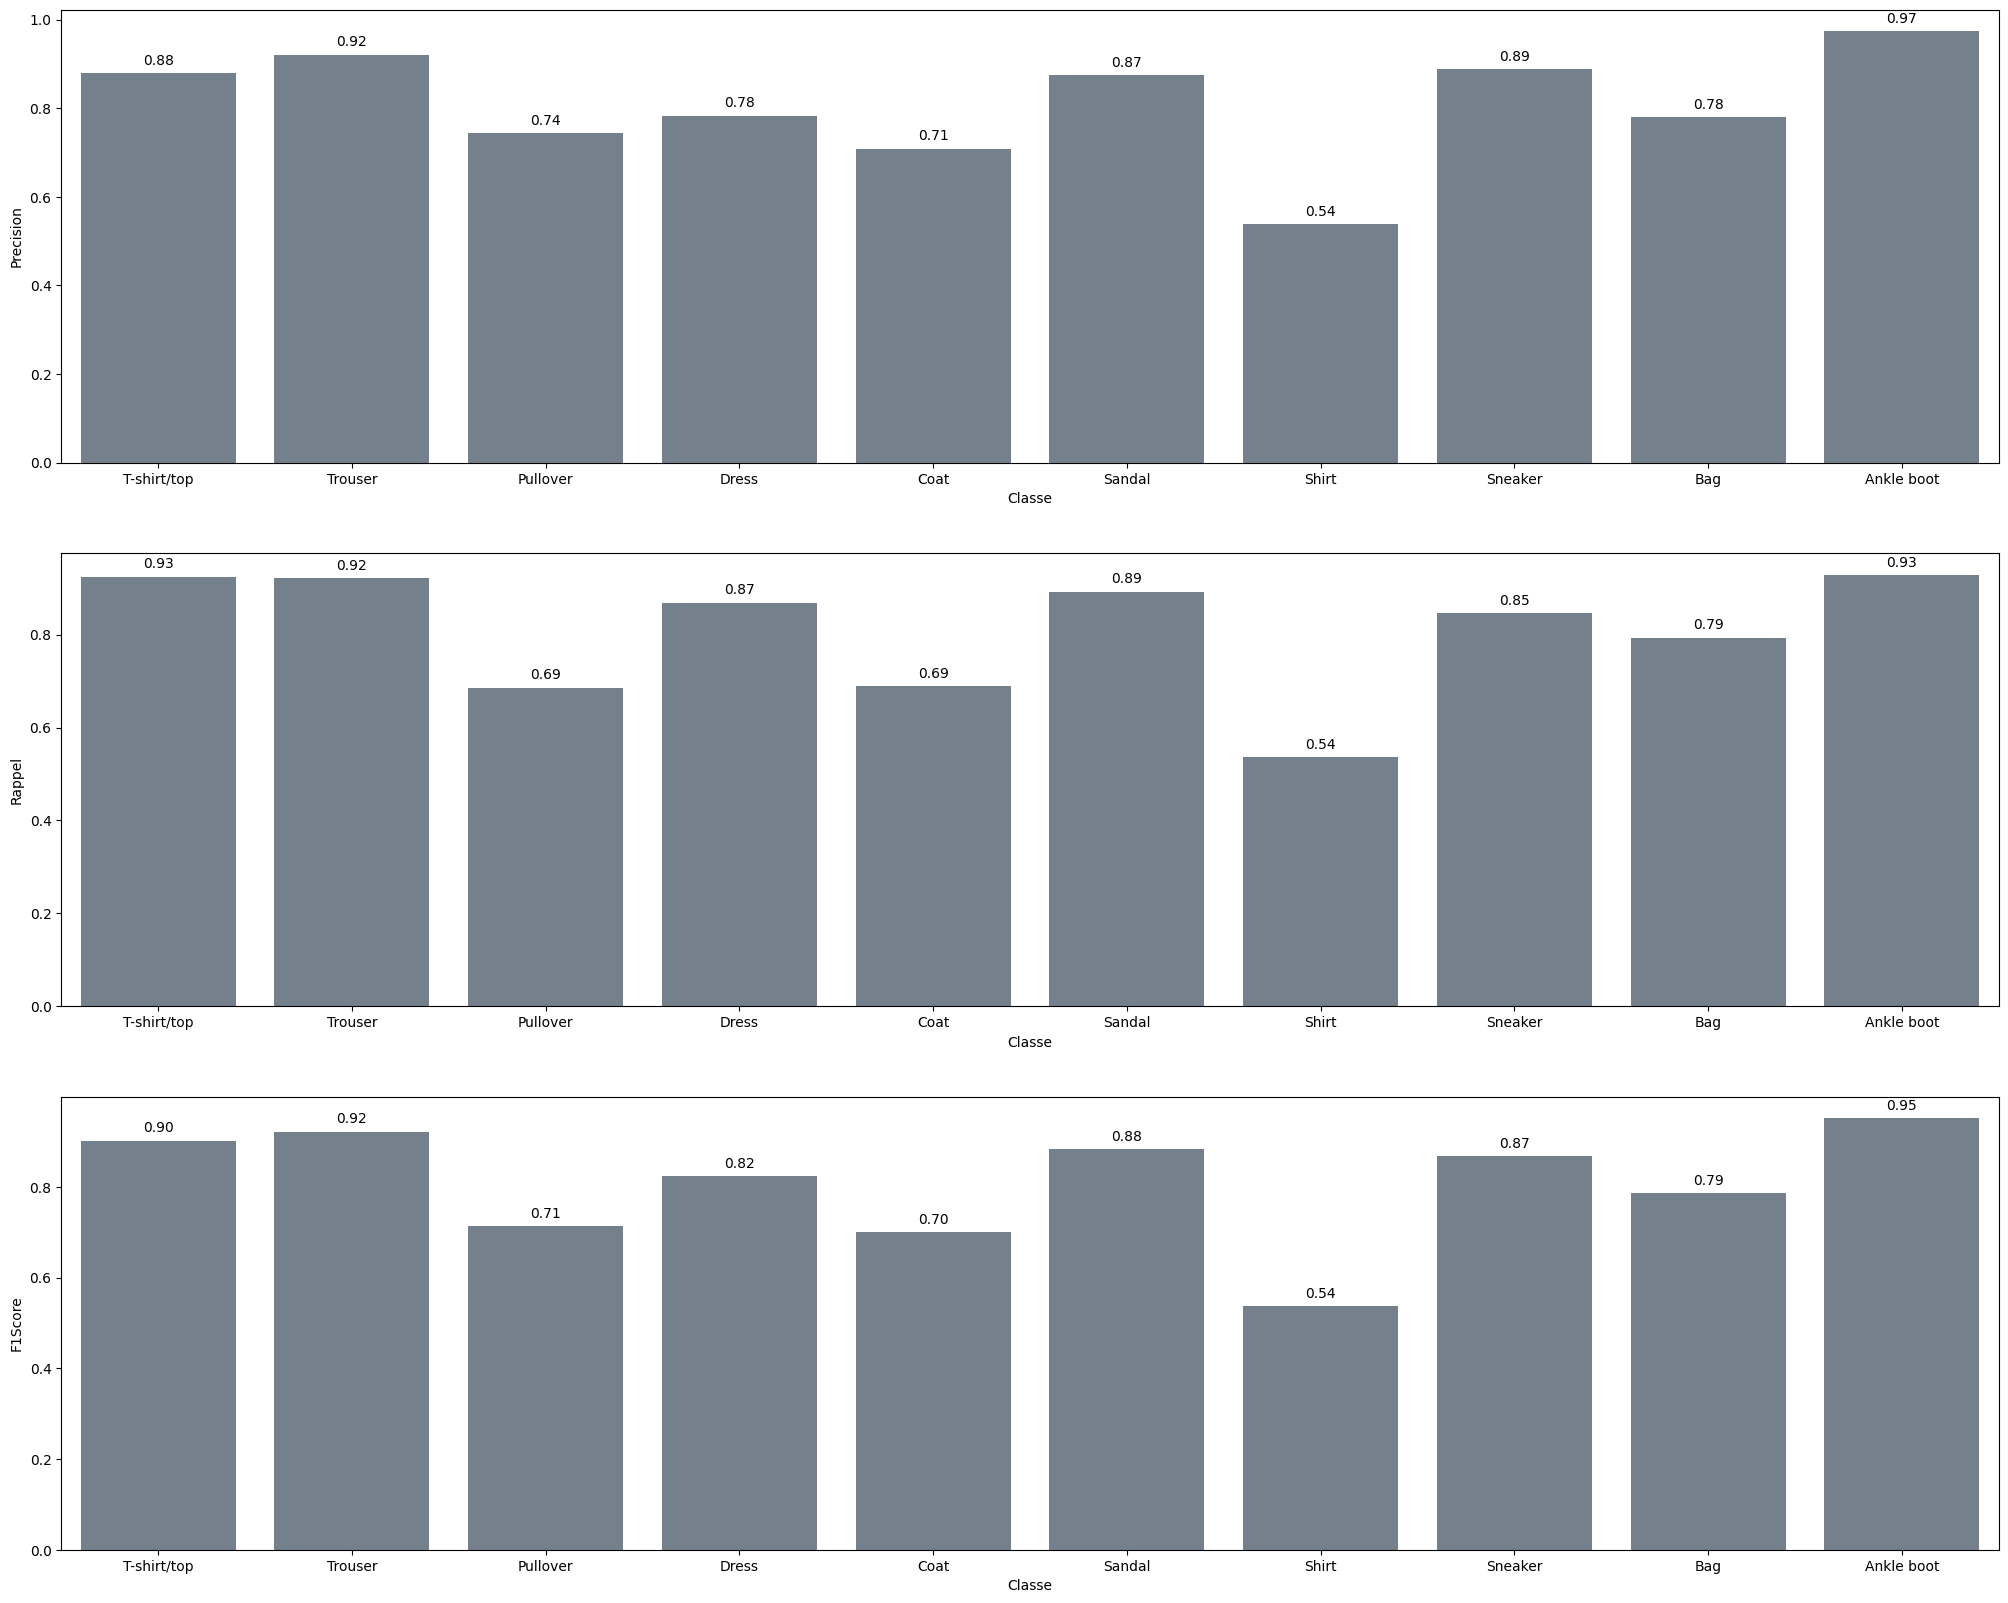

In [90]:
plot_metrics(metrics_cm3)

CallBacks Adding

Pour améliorer l'entrainement de notre modèle, eviter le sur apprentissage et conserver le meilleur modèle, nous allons utiliser des callbacks tels que le EarlyStopping et le ModelCheckPoint

In [91]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [100]:
stop = EarlyStopping(monitor='val_accuracy', patience=3)

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

In [93]:
model = Sequential()

In [94]:
model.add(Dense(units=784, activation='relu', input_shape=(Flatten_X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,950 (2.65 MB)

 Trainable params: 694,950 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
model.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100,
          validation_split=0.2,
          callbacks=[stop, checkpoint])

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8955 - loss: 0.2839 - val_accuracy: 0.8899 - val_loss: 0.3089
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8995 - loss: 0.2693 - val_accuracy: 0.8911 - val_loss: 0.3085
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8976 - loss: 0.2730 - val_accuracy: 0.8941 - val_loss: 0.3007
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8980 - loss: 0.2704 - val_accuracy: 0.8937 - val_loss: 0.2945
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9028 - loss: 0.2603 - val_accuracy: 0.8916 - val_loss: 0.3012
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8981 - loss: 0.2669 - val_accuracy: 0.8929 - val_loss: 0.2902


In [102]:
model.load_weights('best_model.keras')

In [103]:
model.evaluate(Flatten_X_test, hot_y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8859 - loss: 0.3253


[0.3250977694988251, 0.8873999714851379]